# CSE 541 Interactive Learning, Spring 2024, Homework 1


## Question 4

### Algorithm Implementation

In [1]:
import numpy as np
from matplotlib import pyplot as plt 

In [2]:
def ETC(T, m, means):
    """
    T: Time horizon 
    m: tuning hyperparameter
    means: means of the arm distributions
    """
    rng = np.random.default_rng(541)
    n = len(means)
    Obs = np.zeros((T, n))
    Obs_ind = np.zeros((T, n))
    
    for t in range(T):
        mean_ests = np.sum(Obs, axis=0) / np.maximum(np.sum(Obs_ind, axis=0), 1)
        if (t <= m * n):
            I_t = (t % n)
        else:
            I_t = np.argmax(mean_ests)
        Obs_ind[t, I_t] = 1
        Obs[t, I_t] = rng.normal(means[I_t], 1)
    
    return (Obs, Obs_ind)

def UCB(T, means):
    """
    T: Time horizon 
    means: means of the arm distributions
    """
    rng = np.random.default_rng(541)
    n = len(means)
    Obs = np.zeros((T, n))
    Obs_ind = np.zeros((T, n))

    for t in range(n):
        Obs_ind[t, t] = 1
        Obs[t, t] = rng.normal(means[t], 1)
    
    for t in range(n, T):
        mean_ests = np.sum(Obs, axis=0) / np.sum(Obs_ind, axis=0)
        upper_bounds = np.sqrt(2 * np.log(2 * n * T^2) / np.sum(Obs_ind, axis=0))
        I_t = np.argmax(mean_ests + upper_bounds)
        Obs_ind[t, I_t] = 1
        Obs[t, I_t] = rng.normal(means[I_t], 1)
        
    return (Obs, Obs_ind)

def Thompson(T, means):
    rng = np.random.default_rng(541)
    n = len(means)
    Obs = np.zeros((T, n))
    Obs_ind = np.zeros((T, n))

    for t in range(T):
        posterior_means = Obs[:t+1].sum(axis=0) / (t + 1)
        posterior_vars = 1 / (t + 1)
        posterior_samples = rng.normal(posterior_means, posterior_vars)
        I_t = np.argmax(posterior_samples)
        Obs_ind[t, I_t] = 1
        Obs[t, I_t] = rng.normal(means[I_t], 1)

    return (Obs, Obs_ind)    

def regret(means, obs_ind):
    optimal_gap = means.max() - means
    return np.array([(obs_ind[:t+1].sum(axis = 0) * optimal_gap).sum() for t in range(obs_ind.shape[0])])

### First Scenario

In [4]:
n = 10
T = 100000
means = np.zeros(n)
means[0] = 0.1

In [5]:
ETC_1_results = ETC(T, 1, means)
ETC_10_results = ETC(T, 10, means)
ETC_100_results = ETC(T, 100, means)
ETC_1000_results = ETC(T, 1000, means)
ETC_10000_results = ETC(T, 10000, means)
UCB_results = UCB(T, means)
Thompson_results = Thompson(T, means)

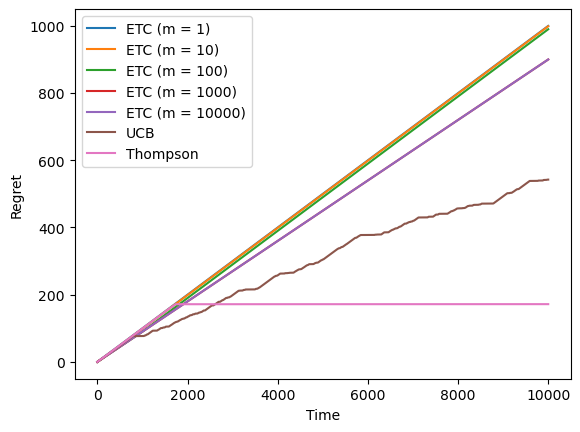

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(T), regret(means, ETC_1_results[1]), label="ETC (m = 1)")
ax.plot(range(T), regret(means, ETC_10_results[1]), label="ETC (m = 10)")
ax.plot(range(T), regret(means, ETC_100_results[1]), label="ETC (m = 100)")
ax.plot(range(T), regret(means, ETC_1000_results[1]), label="ETC (m = 1000)")
ax.plot(range(T), regret(means, ETC_10000_results[1]), label="ETC (m = 10000)")
ax.plot(range(T), regret(means, UCB_results[1]), label="UCB")
ax.plot(range(T), regret(means, Thompson_results[1]), label="Thompson")
ax.set_xlabel("Time")
ax.set_ylabel("Regret")
ax.legend()
plt.show()

### Second Scenario

In [ ]:
n = 40
T = 100000
means = np.ones(n)
means[1:] = 1 - 1 / np.sqrt(np.arange(2, n+1) - 1)

In [ ]:
ETC_1_results = ETC(T, 1, means)
ETC_10_results = ETC(T, 10, means)
ETC_100_results = ETC(T, 100, means)
ETC_1000_results = ETC(T, 1000, means)
ETC_10000_results = ETC(T, 10000, means)
UCB_results = UCB(T, means)
Thompson_results = Thompson(T, means)

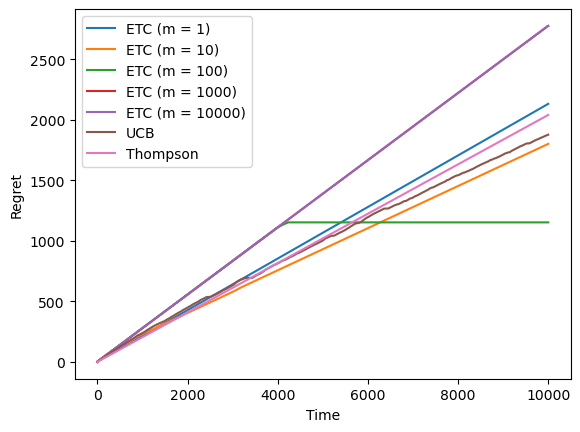

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(T), regret(means, ETC_1_results[1]), label="ETC (m = 1)")
ax.plot(range(T), regret(means, ETC_10_results[1]), label="ETC (m = 10)")
ax.plot(range(T), regret(means, ETC_100_results[1]), label="ETC (m = 100)")
ax.plot(range(T), regret(means, ETC_1000_results[1]), label="ETC (m = 1000)")
ax.plot(range(T), regret(means, ETC_10000_results[1]), label="ETC (m = 10000)")
ax.plot(range(T), regret(means, UCB_results[1]), label="UCB")
ax.plot(range(T), regret(means, Thompson_results[1]), label="Thompson")
ax.set_xlabel("Time")
ax.set_ylabel("Regret")
ax.legend()
plt.show()